In [1]:
#Importing all  the neccessary python libraries 

import pandas as pd
import numpy as np
import pytz
import os 
import matplotlib.pyplot as plt

In [2]:
#Calling out airflow DAG (Directed Acyclic Graph)

from sklearn.linear_model import LinearRegression
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime


C:\Users\Pavillon Plus\AppData\Roaming\Python\Python312\site-packages\airflow\__init__.py:36: RuntimeWarning: Airflow currently can be run on POSIX-compliant Operating Systems. For development, it is regularly tested on fairly modern Linux Distros and recent versions of macOS. On Windows you can run it via WSL2 (Windows Subsystem for Linux 2) or via Linux Containers. The work to add Windows support is tracked via https://github.com/apache/airflow/issues/10388, but it is not a high priority.
  warnings.warn(
OSError while attempting to symlink the latest log directory


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\333356067.py:5 DeprecationWarning: The `airflow.operators.python_operator.PythonOperator` class is deprecated. Please use `'airflow.operators.python.PythonOperator'`.

In [3]:
# Importing energy data file values

def load_energy_data_file():
    datafile = r'C:\Users\Pavillon Plus\Desktop\CV and Cover Letters\Python Practice\t1-coding-challenge-data-engineer-main\dags\energy_data.csv'  #Put actual path of the energy data file
    energy_data = pd.read_csv(datafile)
    
    print("First 10 values of Energy Data:") # printing first ten values in Energy Data file
    print(energy_data.head(10))  
    
    return energy_data

# Loading and display first few data sets
energy_data = load_energy_data_file()

First 10 values of Energy Data:
                   Timestamp  Price  Volume Sell_Buy
0  2024-01-01 03:47:19+00:00  78.33  1037.0     sell
1  2024-01-01 17:33:34+01:00  34.14     NaN     Sell
2  2024-01-01 15:48:47+00:00  24.52  1805.0      BUY
3  2024-01-01 15:26:36+00:00  95.42  1319.0      buy
4  2024-01-01 07:15:19+00:00  65.96  1612.0      BUY
5  2024-01-01 23:54:10+00:00  26.28  1313.0     SELL
6  2024-01-01 16:17:29+00:00  63.61  1551.0      buy
7  2024-01-01 01:19:15+00:00  77.58  1254.0     SELL
8  2024-01-01 02:01:02+01:00  28.35  1331.0     Sell
9  2024-01-01 03:15:52+00:00  80.39  1275.0      Buy


In [4]:
#Data cleaning and arranging the datset in order to perform methametical operations

def arrange_timestamps():
    datafile = r'C:\Users\Pavillon Plus\Desktop\CV and Cover Letters\Python Practice\t1-coding-challenge-data-engineer-main\dags\energy_data.csv'  # Replace with the actual path to the file
    energy_data = pd.read_csv(datafile)

    energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'], errors='coerce') #formating Timestamp column in datatime format
    energy_data = energy_data.dropna(subset=['Timestamp', 'Price', 'Volume', 'Sell_Buy']) #Droing  rows with missing/invalid values
    energy_data['Sell_Buy'] = energy_data['Sell_Buy'].str.lower() #changing sell buy column into one format of string

    energy_data['Day_Index'] = ((energy_data.index // 1000) + 1) #Indexing the days in the month
    sorted_energy_data = energy_data.sort_values(by=['Day_Index', 'Timestamp']).reset_index(drop=True)
    
    
    print("Sample of sorted energy data:")
    print(sorted_energy_data.head(20))  

    return sorted_energy_data
    
sorted_energy_data = arrange_timestamps()

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\746199639.py:7 FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

Sample of sorted energy data:
                    Timestamp  Price  Volume Sell_Buy  Day_Index
0   2024-01-01 00:02:22+01:00  27.25  1125.0     sell          1
1   2024-01-01 00:03:08+01:00  55.96   882.0     sell          1
2   2024-01-01 00:03:48+01:00  91.00   504.0      buy          1
3   2024-01-01 00:03:52+01:00  23.57   979.0      buy          1
4   2024-01-01 00:21:59+01:00  50.29  1934.0     sell          1
5   2024-01-01 00:25:10+01:00  66.50  1614.0      buy          1
6   2024-01-01 00:32:00+01:00  68.06  1310.0     sell          1
7   2024-01-01 00:32:47+01:00  77.43   225.0      buy          1
8   2024-01-01 00:36:26+01:00  79.99  1266.0     sell          1
9   2024-01-01 00:40:09+01:00  61.12   712.0     sell          1
10  2024-01-01 00:00:17+00:00  84.33  1978.0     sell          1
11  2024-01-01 00:02:12+00:00  77.74   539.0      buy          1
12  2024-01-01 00:02:44+00:00  67.88  1598.0     sell          1
13  2024-01-01 00:08:38+00:00  28.11  1718.0      buy       

In [5]:
#Creating function to print specific rows to perform a mannual data checkup and ensure data formats

def print_specific_rows():
    print("Sorted energy from row x to y :")
    print(sorted_energy_data.iloc[940:980])  
    
print_specific_rows()

Sorted energy from row x to y :
                     Timestamp  Price  Volume Sell_Buy  Day_Index
940  2024-01-01 23:17:27+00:00  33.63   371.0      buy          1
941  2024-01-01 23:18:04+00:00  83.14  1858.0     sell          1
942  2024-01-01 23:18:57+00:00  68.19   157.0     sell          1
943  2024-01-01 23:26:40+00:00  60.55  1069.0      buy          1
944  2024-01-01 23:27:26+00:00  55.15   586.0      buy          1
945  2024-01-01 23:28:27+00:00  82.17   703.0     sell          1
946  2024-01-01 23:34:03+00:00  96.47   101.0     sell          1
947  2024-01-01 23:39:50+00:00  99.82   233.0      buy          1
948  2024-01-01 23:41:36+00:00  36.58   721.0     sell          1
949  2024-01-01 23:42:37+00:00  39.13  1514.0      buy          1
950  2024-01-01 23:43:37+00:00  96.93   616.0      buy          1
951  2024-01-01 23:45:50+00:00  70.46  1541.0     sell          1
952  2024-01-01 23:46:54+00:00  38.13  1216.0     sell          1
953  2024-01-01 23:51:17+00:00  65.48   548.

In [6]:
#Counting number of energy data values in each day and estimate missing values in each day

def count_day_index(sorted_energy_data):
    day_counts = sorted_energy_data['Day_Index'].value_counts().sort_index()
    print("\nCount of rows for each day (Day_Index):")
    for day, count in day_counts.items():
        print(f"Day {day}: {count} rows")

    return day_counts
    
day_counts = count_day_index(sorted_energy_data)


Count of rows for each day (Day_Index):
Day 1: 958 rows
Day 2: 967 rows
Day 3: 965 rows
Day 4: 961 rows
Day 5: 966 rows
Day 6: 958 rows
Day 7: 956 rows
Day 8: 951 rows
Day 9: 962 rows
Day 10: 961 rows
Day 11: 961 rows
Day 12: 956 rows
Day 13: 946 rows
Day 14: 956 rows
Day 15: 954 rows
Day 16: 964 rows
Day 17: 973 rows
Day 18: 963 rows
Day 19: 964 rows
Day 20: 963 rows
Day 21: 955 rows
Day 22: 964 rows
Day 23: 962 rows
Day 24: 969 rows
Day 25: 955 rows
Day 26: 950 rows
Day 27: 953 rows
Day 28: 962 rows
Day 29: 970 rows
Day 30: 969 rows
Day 31: 954 rows


In [7]:
#Checking the extreme outliers in the Price values

def check_extreme_outliers(sorted_energy_data):
    lower_threshold = 0.0001 #defining lower and upper threshold for prices
    upper_threshold = 150 #assuming that buying above this price is not beneficial

    # Identify rows with extreme outliers in the Price column
    extreme_outliers = sorted_energy_data[(sorted_energy_data['Price'] > upper_threshold) | 
                                          (sorted_energy_data['Price'] < lower_threshold)]

    if extreme_outliers.empty:
        print("No extreme outliers in Price found.")
    else:
        print("Extreme outliers in Price detected:")
        print(extreme_outliers[['Timestamp', 'Price','Day_Index','Volume','Sell_Buy']])

check_extreme_outliers(sorted_energy_data) # Remove rows with extreme outliers in the Price column


Extreme outliers in Price detected:
                       Timestamp    Price  Day_Index  Volume Sell_Buy
105    2024-01-01 02:16:38+00:00  4611.95          1  1786.0      buy
362    2024-01-01 10:03:24+01:00  4030.98          1  1884.0      buy
512    2024-01-01 12:49:04+00:00  3856.95          1  1947.0      buy
655    2024-01-01 17:11:07+01:00  3248.15          1  1850.0      buy
683    2024-01-01 16:55:05+00:00  3748.38          1   596.0      buy
...                          ...      ...        ...     ...      ...
29322  2024-01-31 13:13:16+00:00  4221.70         31    60.0      buy
29506  2024-01-31 18:09:06+01:00  1360.78         31   198.0      buy
29647  2024-01-31 20:24:08+00:00  3492.02         31   319.0      buy
29679  2024-01-31 21:13:15+00:00  3990.33         31  1581.0     sell
29700  2024-01-31 21:48:49+00:00  3098.30         31   784.0      buy

[308 rows x 5 columns]


In [8]:
#Removing the extreme outliers in the Price values
def remove_extreme_outliers(sorted_energy_data):
    lower_threshold = 0.0001
    upper_threshold = 150

    filtered_data = sorted_energy_data[(sorted_energy_data['Price'] >= lower_threshold) & (sorted_energy_data['Price'] <= upper_threshold)]
    
    print(f"Original dataset size: {len(sorted_energy_data)} rows")
    print(f"Filtered dataset size: {len(filtered_data)} rows")
    print(f"Number of rows removed: {len(sorted_energy_data) - len(filtered_data)}")
    
    print("Sample of sorted energy data:")
    print(sorted_energy_data.head(20)) 
    
    return filtered_data
 
sorted_energy_data = remove_extreme_outliers(sorted_energy_data)


Original dataset size: 29768 rows
Filtered dataset size: 29460 rows
Number of rows removed: 308
Sample of sorted energy data:
                    Timestamp  Price  Volume Sell_Buy  Day_Index
0   2024-01-01 00:02:22+01:00  27.25  1125.0     sell          1
1   2024-01-01 00:03:08+01:00  55.96   882.0     sell          1
2   2024-01-01 00:03:48+01:00  91.00   504.0      buy          1
3   2024-01-01 00:03:52+01:00  23.57   979.0      buy          1
4   2024-01-01 00:21:59+01:00  50.29  1934.0     sell          1
5   2024-01-01 00:25:10+01:00  66.50  1614.0      buy          1
6   2024-01-01 00:32:00+01:00  68.06  1310.0     sell          1
7   2024-01-01 00:32:47+01:00  77.43   225.0      buy          1
8   2024-01-01 00:36:26+01:00  79.99  1266.0     sell          1
9   2024-01-01 00:40:09+01:00  61.12   712.0     sell          1
10  2024-01-01 00:00:17+00:00  84.33  1978.0     sell          1
11  2024-01-01 00:02:12+00:00  77.74   539.0      buy          1
12  2024-01-01 00:02:44+00:00

In [9]:
#Creating separate columns of Date and Time from the Timestamp column

def split_date_and_time(data):
    
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True) # Ensure Timestamp is in datetime format and converted to UTC
    data['Timestamp'] = data['Timestamp'].dt.tz_convert(None) # Convert Timestamp to timezone-naive format if needed
    
    data['Date'] = data['Timestamp'].dt.date #Seperating out date and time 
    data['Time'] = data['Timestamp'].dt.time  

    #Considering the data values only from 2024-01-01 to 2024-01-31
    filtered_data = sorted_energy_data[(sorted_energy_data['Date'] >= pd.to_datetime('2024-01-01').date()) &
                                   (sorted_energy_data['Date'] <= pd.to_datetime('2024-01-31').date())]
    
    print("Sample of data with separate Date and Time columns:")
    print(data.head(20))

    return data

sorted_energy_data = split_date_and_time(sorted_energy_data)

Sample of data with separate Date and Time columns:
             Timestamp  Price  Volume Sell_Buy  Day_Index        Date  \
0  2023-12-31 23:02:22  27.25  1125.0     sell          1  2023-12-31   
1  2023-12-31 23:03:08  55.96   882.0     sell          1  2023-12-31   
2  2023-12-31 23:03:48  91.00   504.0      buy          1  2023-12-31   
3  2023-12-31 23:03:52  23.57   979.0      buy          1  2023-12-31   
4  2023-12-31 23:21:59  50.29  1934.0     sell          1  2023-12-31   
5  2023-12-31 23:25:10  66.50  1614.0      buy          1  2023-12-31   
6  2023-12-31 23:32:00  68.06  1310.0     sell          1  2023-12-31   
7  2023-12-31 23:32:47  77.43   225.0      buy          1  2023-12-31   
8  2023-12-31 23:36:26  79.99  1266.0     sell          1  2023-12-31   
9  2023-12-31 23:40:09  61.12   712.0     sell          1  2023-12-31   
10 2024-01-01 00:00:17  84.33  1978.0     sell          1  2024-01-01   
11 2024-01-01 00:02:12  77.74   539.0      buy          1  2024-01-01   

In [10]:
#Finding missing time values in updated database 

def find_missing_intervals(data):

    # Calculating time differences between consecutive rows
    data['Time_Difference'] = data['Timestamp'].diff().dt.total_seconds() / 60  # Converting the values in minutes
    missing_intervals = data[data['Time_Difference'] > 5]  # Identify gaps greater than 5 minutes

    print("Rows with time gaps exceeding 5 minutes:")
    print(missing_intervals[['Timestamp', 'Time_Difference']])
    
    return missing_intervals

missing_intervals = find_missing_intervals(sorted_energy_data)


Rows with time gaps exceeding 5 minutes:
                Timestamp  Time_Difference
4     2023-12-31 23:21:59        18.116667
6     2023-12-31 23:32:00         6.833333
10    2024-01-01 00:00:17        20.133333
13    2024-01-01 00:08:38         5.900000
30    2024-01-01 00:40:11         7.350000
...                   ...              ...
29732 2024-01-31 22:31:19         5.233333
29753 2024-01-31 23:14:47         6.316667
29755 2024-01-31 23:26:45         8.000000
29759 2024-01-31 23:38:52         5.016667
29760 2024-01-31 23:47:53         9.016667

[1192 rows x 2 columns]


In [11]:
#Filling the missing values in the new datsets

def fill_missing_intervals(data):

    data['Timestamp'] = pd.to_datetime(data['Timestamp'], utc=True)
    data = data.sort_values(by='Timestamp').reset_index(drop=True)
    data['Time_Difference'] = data['Timestamp'].diff().dt.total_seconds() / 60  # in minutes
    missing_intervals = data[data['Time_Difference'] > 5]

    
    new_rows = [] # Creating a DataFrame to hold the new rows
    
    for index, row in missing_intervals.iterrows():
        prev_row = data.iloc[index - 1] # getting the previous and next rows
        next_row = row

        current_time = prev_row['Timestamp'] + pd.Timedelta(minutes=5) # generating timestamps for missing intervals
        while current_time < next_row['Timestamp']:
            # Assuming the price and volume is calculated using the average Price and Volume
            avg_price = (prev_row['Price'] + next_row['Price']) / 2
            avg_volume = (prev_row['Volume'] + next_row['Volume']) / 2

            # Creating a new row for the datafiling
            new_row = {
                'Timestamp': current_time,
                'Price': avg_price,
                'Volume': avg_volume,
                'Sell_Buy': 'interpolated',  
                'Day_Index': prev_row['Day_Index'],
            }
            new_rows.append(new_row)

            
            current_time += pd.Timedelta(minutes=5) # incrementing time by 5 minutes

   
    new_data = pd.DataFrame(new_rows)  # Add new rows to the original DataFrame
    cleaned_data = pd.concat([data, new_data]).sort_values(by='Timestamp').reset_index(drop=True)

    
    cleaned_data.drop(columns=['Time_Difference'], inplace=True) # Drop the Time_Difference column

    print("Sample of cleaned data with interpolated rows:")
    print(cleaned_data.head(20))
    
    return cleaned_data

cleaned_data = fill_missing_intervals(sorted_energy_data)

Sample of cleaned data with interpolated rows:
                   Timestamp   Price  Volume      Sell_Buy  Day_Index  \
0  2023-12-31 23:02:22+00:00  27.250  1125.0          sell          1   
1  2023-12-31 23:03:08+00:00  55.960   882.0          sell          1   
2  2023-12-31 23:03:48+00:00  91.000   504.0           buy          1   
3  2023-12-31 23:03:52+00:00  23.570   979.0           buy          1   
4  2023-12-31 23:08:52+00:00  36.930  1456.5  interpolated          1   
5  2023-12-31 23:13:52+00:00  36.930  1456.5  interpolated          1   
6  2023-12-31 23:18:52+00:00  36.930  1456.5  interpolated          1   
7  2023-12-31 23:21:59+00:00  50.290  1934.0          sell          1   
8  2023-12-31 23:25:10+00:00  66.500  1614.0           buy          1   
9  2023-12-31 23:30:10+00:00  67.280  1462.0  interpolated          1   
10 2023-12-31 23:32:00+00:00  68.060  1310.0          sell          1   
11 2023-12-31 23:32:47+00:00  77.430   225.0           buy          1   
12 2

In [12]:
# Counting number of values in each day in cleaned datasets

def count_day_index(cleaned_data):
    day_counts = cleaned_data['Day_Index'].value_counts().sort_index()
    
    print("\nCount of rows for each day (Day_Index):")
    for day, count in day_counts.items():
        print(f"Day {day}: {count} rows")

    return day_counts

day_counts = count_day_index(cleaned_data)


Count of rows for each day (Day_Index):
Day 1: 997 rows
Day 2: 979 rows
Day 3: 998 rows
Day 4: 987 rows
Day 5: 1001 rows
Day 6: 976 rows
Day 7: 987 rows
Day 8: 977 rows
Day 9: 981 rows
Day 10: 987 rows
Day 11: 990 rows
Day 12: 987 rows
Day 13: 972 rows
Day 14: 980 rows
Day 15: 974 rows
Day 16: 985 rows
Day 17: 996 rows
Day 18: 988 rows
Day 19: 990 rows
Day 20: 993 rows
Day 21: 974 rows
Day 22: 991 rows
Day 23: 975 rows
Day 24: 986 rows
Day 25: 980 rows
Day 26: 987 rows
Day 27: 978 rows
Day 28: 987 rows
Day 29: 1002 rows
Day 30: 997 rows
Day 31: 978 rows


In [13]:
#Spiliting the cleaned datasets into daily datasets

def split_data_by_day(cleaned_data):
  
    cleaned_data['Timestamp'] = pd.to_datetime(cleaned_data['Timestamp'], utc=True)
    cleaned_data['Date'] = cleaned_data['Timestamp'].dt.date
    grouped_data = {day: group for day, group in cleaned_data.groupby('Date')}

    for day, group in grouped_data.items():
        print(f"\nData for {day}:")
        print(group.head(2))

    return grouped_data


daily_data = split_data_by_day(cleaned_data)



Data for 2023-12-31:
                  Timestamp  Price  Volume Sell_Buy  Day_Index        Date  \
0 2023-12-31 23:02:22+00:00  27.25  1125.0     sell          1  2023-12-31   
1 2023-12-31 23:03:08+00:00  55.96   882.0     sell          1  2023-12-31   

       Time  
0  23:02:22  
1  23:03:08  

Data for 2024-01-01:
                   Timestamp   Price  Volume      Sell_Buy  Day_Index  \
17 2024-01-01 00:00:09+00:00  72.725  1345.0  interpolated          1   
18 2024-01-01 00:00:17+00:00  84.330  1978.0          sell          1   

          Date      Time  
17  2024-01-01       NaN  
18  2024-01-01  00:00:17  

Data for 2024-01-02:
                     Timestamp  Price  Volume Sell_Buy  Day_Index        Date  \
1001 2024-01-02 00:03:01+00:00  53.77  1486.0     sell          2  2024-01-02   
1002 2024-01-02 00:04:45+00:00  59.70   623.0     sell          2  2024-01-02   

          Time  
1001  00:03:01  
1002  00:04:45  

Data for 2024-01-03:
                     Timestamp  Price  

In [14]:
# Creating an output data in the name of processed data
output_folder = 'processed_data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


# Function to split data by day and save each day's data as a Parquet file
def save_daily_parquet(cleaned_data, output_folder):
    cleaned_data['Date'] = cleaned_data['Timestamp'].dt.date
    grouped_data = cleaned_data.groupby('Date')

    # Looping through each group and save as Parquet file
    for day, group in grouped_data: 
        filename = f"{output_folder}/{day}.parquet"
        group.to_parquet(filename, index=False)
        print(f"Saved data for {day} as {filename}")

save_daily_parquet(cleaned_data, output_folder)


Saved data for 2023-12-31 as processed_data/2023-12-31.parquet
Saved data for 2024-01-01 as processed_data/2024-01-01.parquet
Saved data for 2024-01-02 as processed_data/2024-01-02.parquet
Saved data for 2024-01-03 as processed_data/2024-01-03.parquet
Saved data for 2024-01-04 as processed_data/2024-01-04.parquet
Saved data for 2024-01-05 as processed_data/2024-01-05.parquet
Saved data for 2024-01-06 as processed_data/2024-01-06.parquet
Saved data for 2024-01-07 as processed_data/2024-01-07.parquet
Saved data for 2024-01-08 as processed_data/2024-01-08.parquet
Saved data for 2024-01-09 as processed_data/2024-01-09.parquet
Saved data for 2024-01-10 as processed_data/2024-01-10.parquet
Saved data for 2024-01-11 as processed_data/2024-01-11.parquet
Saved data for 2024-01-12 as processed_data/2024-01-12.parquet
Saved data for 2024-01-13 as processed_data/2024-01-13.parquet
Saved data for 2024-01-14 as processed_data/2024-01-14.parquet
Saved data for 2024-01-15 as processed_data/2024-01-15.

In [15]:
#Task 1 : Directory containing daily Parquet files and Aggregation & Scenario Simulation
processed_data_dir = 'processed_data'

# Creating a directory to save hourly aggregates data values 
hourly_aggregates_dir = 'hourly_aggregates'
os.makedirs(hourly_aggregates_dir, exist_ok=True)

def compute_hourly_aggregates(parquet_file):
    daily_data = pd.read_parquet(parquet_file)

    daily_data['Timestamp'] = pd.to_datetime(daily_data['Timestamp'], utc=True)
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')
    

    # Spliting dataset into sell and buy orders
    sell_orders = daily_data[daily_data['Sell_Buy'] == 'sell']
    buy_orders = daily_data[daily_data['Sell_Buy'] == 'buy']

    # Calculating hourly aggregates for sell orders
    sell_hourly = sell_orders.groupby('Hour').agg(
        avg_sell_price=('Price', 'mean'),
        min_sell_price=('Price', 'min'),
        max_sell_price=('Price', 'max'),
        total_sell_volume=('Volume', 'sum'),
    ).reset_index()

    # Calculating VWAP for sell orders
    sell_hourly['sell_vwap'] = (
        sell_orders.groupby('Hour')
        .apply(lambda x: (x['Price'] * x['Volume']).sum() / x['Volume'].sum() if x['Volume'].sum() > 0 else 0)
        .values
    )

    # Calculating hourly aggregates for buy orders
    buy_hourly = buy_orders.groupby('Hour').agg(
        avg_buy_price=('Price', 'mean'),
        min_buy_price=('Price', 'min'),
        max_buy_price=('Price', 'max'),
        total_buy_volume=('Volume', 'sum'),
    ).reset_index()

    # Calculating VWAP for buy orders
    buy_hourly['buy_vwap'] = (
        buy_orders.groupby('Hour')
        .apply(lambda x: (x['Price'] * x['Volume']).sum() / x['Volume'].sum() if x['Volume'].sum() > 0 else 0)
        .values
    )

    # Merging buy and sell hourly aggregates
    hourly_aggregates = pd.merge(sell_hourly, buy_hourly, on='Hour', how='outer').sort_values(by='Hour')
    
    return hourly_aggregates

# Iterate through each daily Parquet file and compute aggregates
for parquet_file in os.listdir(processed_data_dir):
    if parquet_file.endswith('.parquet'):
        
        daily_file_path = os.path.join(processed_data_dir, parquet_file)
    
        hourly_aggregates = compute_hourly_aggregates(daily_file_path) # Compute hourly aggregates
        output_file = os.path.join(hourly_aggregates_dir, f"hourly_{parquet_file}")  # Save to new Parquet file
        hourly_aggregates.to_parquet(output_file, index=False)
        
        print(f"Hourly aggregates saved to: {output_file}")
        print(f"Processing file: {parquet_file}")
        print(hourly_aggregates.head(5))


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2023-12-31.parquet
Processing file: 2023-12-31.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2023-12-31 23:00:00+00:00       57.111667           27.25           79.99   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0             7229.0  56.884384         64.625          23.57           91.0   

   total_buy_volume   buy_vwap  
0            3322.0  58.305774  


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-01.parquet
Processing file: 2024-01-01.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-01 00:00:00+00:00       69.057647           32.77           93.75   
1 2024-01-01 01:00:00+00:00       62.038095           24.10           96.01   
2 2024-01-01 02:00:00+00:00       59.015455           22.66           99.07   
3 2024-01-01 03:00:00+00:00       61.728750           20.22           95.15   
4 2024-01-01 04:00:00+00:00       63.376111           21.35           99.79   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18048.0  71.424473      64.256667          28.11          92.32   
1            25560.0  63.422583      63.526364          20.87          99.26   
2            47456.0  81.701268      57.799474          22.69          95.68   
3            49609.0  84.670176      59.478889          24.95          99.26   
4            1858

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-02.parquet
Processing file: 2024-01-02.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-02 00:00:00+00:00       63.443200           23.09           99.82   
1 2024-01-02 01:00:00+00:00       57.076667           31.22           97.56   
2 2024-01-02 02:00:00+00:00       65.724615           30.62           91.31   
3 2024-01-02 03:00:00+00:00       55.933158           20.68           99.92   
4 2024-01-02 04:00:00+00:00       52.630417           20.24           97.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22510.0  63.063174      63.840909          23.55          97.68   
1            56920.0  51.827821      57.975909          20.71          96.85   
2            11689.0  72.556183      60.459500          21.39          94.50   
3            25414.0  55.888114      64.162609          27.67          99.58   
4            5595

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-03.parquet
Processing file: 2024-01-03.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-03 00:00:00+00:00       66.317692           24.00           99.70   
1 2024-01-03 01:00:00+00:00       68.729032           20.76           98.66   
2 2024-01-03 02:00:00+00:00       56.973750           22.24           91.62   
3 2024-01-03 03:00:00+00:00       55.858000           21.93           96.81   
4 2024-01-03 04:00:00+00:00       60.244211           22.04           93.54   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17661.0  64.513862      58.806842          22.05          91.54   
1            29352.0  72.843014      59.277059          22.45          83.67   
2            43251.0  47.328851      55.117586          20.14          98.52   
3            30845.0  55.164277      58.690645          20.16          95.11   
4            2450

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-04.parquet
Processing file: 2024-01-04.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-04 00:00:00+00:00       54.986364           21.06           93.56   
1 2024-01-04 01:00:00+00:00       70.338571           46.53           92.55   
2 2024-01-04 02:00:00+00:00       60.078824           22.13           96.15   
3 2024-01-04 03:00:00+00:00       62.548824           22.21           99.30   
4 2024-01-04 04:00:00+00:00       65.601538           28.18           99.81   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            19224.0  57.360803      53.650000          22.49          91.62   
1            14102.0  66.918963      57.463500          24.25          90.73   
2            18746.0  67.245444      62.602857          20.72          93.20   
3            16640.0  57.420165      61.874667          25.74          85.53   
4            2866

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-05.parquet
Processing file: 2024-01-05.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-05 00:00:00+00:00       60.527727           21.08           98.41   
1 2024-01-05 01:00:00+00:00       58.224762           24.12           96.14   
2 2024-01-05 02:00:00+00:00       59.415500           20.17           96.02   
3 2024-01-05 03:00:00+00:00       50.882778           20.01           90.01   
4 2024-01-05 04:00:00+00:00       71.180769           30.00           96.32   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22272.0  60.434911      56.890833          26.34          96.73   
1            23815.0  58.951072      64.675500          26.87          97.63   
2            20593.0  61.434446      63.637826          24.47          95.78   
3            13164.0  51.682662      57.427143          22.84          97.22   
4            1502

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-06.parquet
Processing file: 2024-01-06.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-06 00:00:00+00:00       52.416667           21.33           92.87   
1 2024-01-06 01:00:00+00:00       53.900741           21.00           99.47   
2 2024-01-06 02:00:00+00:00       60.801500           24.00           94.93   
3 2024-01-06 03:00:00+00:00       59.537857           21.00           96.74   
4 2024-01-06 04:00:00+00:00       61.846667           27.56           99.76   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15197.0  50.429202      66.128462          34.77          97.82   
1            23897.0  53.544906      58.485000          20.00          89.34   
2            15248.0  57.446403      55.485882          24.55          99.63   
3            14083.0  54.954852      56.387500          20.01          93.97   
4            2797

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-07.parquet
Processing file: 2024-01-07.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-07 00:00:00+00:00       59.319375           23.62           98.69   
1 2024-01-07 01:00:00+00:00       54.655294           22.97           96.68   
2 2024-01-07 02:00:00+00:00       63.642424           22.49           95.90   
3 2024-01-07 03:00:00+00:00       62.381739           29.41           93.42   
4 2024-01-07 04:00:00+00:00       69.622308           41.46           93.87   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17442.0  56.733802      66.738421          21.21          91.65   
1            17527.0  57.718259      53.604762          21.65          95.64   
2            33274.0  63.011520      66.502308          29.29          94.66   
3            26259.0  61.626055      59.624706          22.23          89.75   
4             909

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-08.parquet
Processing file: 2024-01-08.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-08 00:00:00+00:00       56.751250           22.76           89.47   
1 2024-01-08 01:00:00+00:00       68.598421           34.64           99.35   
2 2024-01-08 02:00:00+00:00       58.197407           22.44           95.79   
3 2024-01-08 03:00:00+00:00       58.710588           21.06           99.23   
4 2024-01-08 04:00:00+00:00       64.686667           37.33           96.35   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            67944.0  68.081028      60.612000          25.04          97.36   
1            18283.0  68.047714      58.694737          24.36          96.30   
2            27226.0  58.536544      54.844583          20.10          94.50   
3            14972.0  59.999172      54.616923          23.79          95.47   
4            1610

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-09.parquet
Processing file: 2024-01-09.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-09 00:00:00+00:00       64.398462           36.47           99.60   
1 2024-01-09 01:00:00+00:00       52.974167           23.40           99.68   
2 2024-01-09 02:00:00+00:00       64.462000           28.58           98.13   
3 2024-01-09 03:00:00+00:00       54.376500           23.38           90.40   
4 2024-01-09 04:00:00+00:00       64.108667           24.56           96.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15903.0  67.666586      65.184762          20.84          95.24   
1            10300.0  54.177372      56.247647          20.60          98.39   
2            16169.0  73.376005      64.227059          20.69          96.12   
3            57250.0  45.002935      65.241667          23.00          99.26   
4            5364

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-10.parquet
Processing file: 2024-01-10.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-10 00:00:00+00:00       57.417895           26.47           88.14   
1 2024-01-10 01:00:00+00:00       55.778235           21.60           95.65   
2 2024-01-10 02:00:00+00:00       54.034000           23.31           98.89   
3 2024-01-10 03:00:00+00:00       66.792000           22.89           93.29   
4 2024-01-10 04:00:00+00:00       50.765238           22.18           95.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            40601.0  61.911058      70.217000          24.09          99.51   
1            20723.0  52.806681      65.591765          23.06          96.90   
2            16910.0  53.200862      54.353913          20.26          98.24   
3            24697.0  70.069205      53.526000          21.00          97.17   
4            8190

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-11.parquet
Processing file: 2024-01-11.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-11 00:00:00+00:00       57.613333           22.66           93.35   
1 2024-01-11 01:00:00+00:00       63.482143           25.06           91.00   
2 2024-01-11 02:00:00+00:00       67.635556           21.83           98.83   
3 2024-01-11 03:00:00+00:00       63.550000           21.08           95.11   
4 2024-01-11 04:00:00+00:00       58.156667           20.00           98.38   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18527.0  59.061076      66.464643          22.58          95.76   
1            15642.0  65.626842      63.950455          25.33          95.27   
2            55761.0  77.637360      57.608750          22.24          94.80   
3            60183.0  68.862212      65.884000          39.52          92.00   
4            3736

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-12.parquet
Processing file: 2024-01-12.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-12 00:00:00+00:00       56.110000           22.94           96.47   
1 2024-01-12 01:00:00+00:00       60.631000           21.92           97.42   
2 2024-01-12 02:00:00+00:00       55.065263           20.06           85.41   
3 2024-01-12 03:00:00+00:00       60.048462           21.13           95.00   
4 2024-01-12 04:00:00+00:00       56.593158           20.94           94.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            20451.0  57.121350      64.657500          25.84          98.24   
1            24247.0  59.665974      61.279091          21.54          95.47   
2            16773.0  54.227417      58.926111          21.04          96.07   
3            15396.0  63.750242      65.605000          39.32          99.67   
4            1834

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-13.parquet
Processing file: 2024-01-13.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-13 00:00:00+00:00       49.598235           20.43           75.64   
1 2024-01-13 01:00:00+00:00       56.245000           24.64           96.04   
2 2024-01-13 02:00:00+00:00       58.451765           21.89           92.17   
3 2024-01-13 03:00:00+00:00       56.656364           21.00           92.34   
4 2024-01-13 04:00:00+00:00       61.207500           30.08           95.07   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18371.0  51.277840      57.702778          23.87          99.31   
1            12610.0  53.882646      56.403500          24.37          97.06   
2            15456.0  56.613783      57.722727          22.04          98.64   
3            23692.0  56.429391      62.013077          22.18          97.03   
4            5215

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-14.parquet
Processing file: 2024-01-14.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-14 00:00:00+00:00       59.546471           22.42           97.78   
1 2024-01-14 01:00:00+00:00       62.334706           26.59           99.27   
2 2024-01-14 02:00:00+00:00       62.683077           21.61           99.83   
3 2024-01-14 03:00:00+00:00       61.656667           20.85           97.55   
4 2024-01-14 04:00:00+00:00       61.007407           25.82           97.66   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15550.0  65.264430      74.872500          43.97          98.32   
1            61701.0  69.869937      61.899474          25.33          95.89   
2            15282.0  61.346438      52.646000          27.56          62.32   
3            67650.0  58.187797      62.306786          20.07          99.23   
4            2987

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-15.parquet
Processing file: 2024-01-15.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-15 00:00:00+00:00       54.412500           21.32           95.78   
1 2024-01-15 01:00:00+00:00       66.391667           29.20           93.35   
2 2024-01-15 02:00:00+00:00       69.233571           21.96           99.78   
3 2024-01-15 03:00:00+00:00       53.341818           20.71           94.00   
4 2024-01-15 04:00:00+00:00       52.164375           24.67           97.07   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15583.0  59.345290      55.650370          20.49          96.32   
1            12410.0  64.787224      61.411667          27.62          97.46   
2            13231.0  75.879482      53.456087          23.62          95.38   
3            23204.0  51.592848      63.334762          22.10          99.54   
4            1326

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-16.parquet
Processing file: 2024-01-16.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-16 00:00:00+00:00       69.615385           31.60           98.05   
1 2024-01-16 01:00:00+00:00       54.345714           21.77           95.40   
2 2024-01-16 02:00:00+00:00       62.229412           20.95           95.85   
3 2024-01-16 03:00:00+00:00       60.594545           23.47           97.60   
4 2024-01-16 04:00:00+00:00       50.507273           24.08           99.56   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            27466.0  69.527956      55.385000          27.07          96.10   
1            37054.0  47.031872      61.288889          20.42          98.68   
2            14457.0  69.326175      53.284375          24.30          91.76   
3            14976.0  58.649744      56.855000          22.05          99.32   
4            1405

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-17.parquet
Processing file: 2024-01-17.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-17 00:00:00+00:00       49.155238           22.88           97.60   
1 2024-01-17 01:00:00+00:00       61.466842           30.20           97.70   
2 2024-01-17 02:00:00+00:00       68.461333           37.34           97.97   
3 2024-01-17 03:00:00+00:00       67.258636           27.97           97.12   
4 2024-01-17 04:00:00+00:00       61.602105           22.87           99.47   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            55201.0  30.941518      58.110833          21.28          99.26   
1            18308.0  62.709872      57.087143          21.18          99.69   
2            15818.0  68.825317      45.694545          25.19          95.65   
3            20871.0  69.802721      65.895455          34.80          99.27   
4            4842

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-18.parquet
Processing file: 2024-01-18.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-18 00:00:00+00:00       68.737391           21.15           99.79   
1 2024-01-18 01:00:00+00:00       64.852500           30.06           93.94   
2 2024-01-18 02:00:00+00:00       57.377273           20.28           92.48   
3 2024-01-18 03:00:00+00:00       62.456190           32.43           93.45   
4 2024-01-18 04:00:00+00:00       56.694286           28.00           87.28   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            63001.0  61.334445      53.369412          24.33          94.83   
1            21567.0  67.057011      57.548966          24.32          97.95   
2            24424.0  58.053386      56.527778          21.49          90.60   
3            68155.0  47.473759      62.247000          20.76          95.00   
4            1298

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-19.parquet
Processing file: 2024-01-19.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-19 00:00:00+00:00       62.510417           26.75           95.96   
1 2024-01-19 01:00:00+00:00       59.422000           21.96           92.88   
2 2024-01-19 02:00:00+00:00       67.187273           27.00           97.39   
3 2024-01-19 03:00:00+00:00       62.079000           20.70           93.33   
4 2024-01-19 04:00:00+00:00       59.311765           23.84           98.03   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            67267.0  70.649500      60.790000          22.23          96.64   
1            22416.0  58.371923      71.471818          35.56          99.65   
2            31069.0  75.057238      64.058148          21.73          98.91   
3            22822.0  64.377338      60.595000          20.61          98.19   
4            1639

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-20.parquet
Processing file: 2024-01-20.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-20 00:00:00+00:00       66.427273           31.45           99.46   
1 2024-01-20 01:00:00+00:00       65.938214           23.82           98.28   
2 2024-01-20 02:00:00+00:00       66.977000           22.30           97.29   
3 2024-01-20 03:00:00+00:00       63.704667           21.94           99.64   
4 2024-01-20 04:00:00+00:00       67.219048           20.92           99.52   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24488.0  64.874357      54.895909          22.07          93.27   
1            28193.0  69.079166      68.643333          26.39          97.85   
2            21491.0  70.051926      71.290714          30.53          96.71   
3            26376.0  62.627720      49.787692          21.72          95.30   
4            5909

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-21.parquet
Processing file: 2024-01-21.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-21 00:00:00+00:00       54.736400           25.30           98.97   
1 2024-01-21 01:00:00+00:00       60.279310           21.05           99.54   
2 2024-01-21 02:00:00+00:00       57.744444           25.96           98.82   
3 2024-01-21 03:00:00+00:00       63.009231           25.42           98.25   
4 2024-01-21 04:00:00+00:00       50.297500           21.87           99.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24822.0  53.134462      59.748889          23.30          97.78   
1            41366.0  64.162591      61.815417          24.84          96.08   
2            21110.0  54.713900      63.057200          23.88          97.52   
3            31222.0  61.166393      62.576800          21.03          96.40   
4            1688

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-22.parquet
Processing file: 2024-01-22.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-22 00:00:00+00:00       55.200769           24.88           93.50   
1 2024-01-22 01:00:00+00:00       58.886111           21.30           98.56   
2 2024-01-22 02:00:00+00:00       61.860000           24.14           97.33   
3 2024-01-22 03:00:00+00:00       56.923103           25.57           99.92   
4 2024-01-22 04:00:00+00:00       60.264706           20.57           99.76   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17842.0  53.079398      57.690476          21.02          99.87   
1            18212.0  60.960925      64.877742          21.25          98.41   
2            23267.0  59.261873      57.699524          21.56          94.21   
3            57044.0  54.467242      54.064444          20.86          99.39   
4            1901

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-23.parquet
Processing file: 2024-01-23.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-23 00:00:00+00:00       66.362941           28.06           97.27   
1 2024-01-23 01:00:00+00:00       57.399200           22.32           98.94   
2 2024-01-23 02:00:00+00:00       56.743846           22.51           89.40   
3 2024-01-23 03:00:00+00:00       60.383500           20.17           99.27   
4 2024-01-23 04:00:00+00:00       61.184138           23.18           97.98   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18838.0  66.541159      68.617273          32.01          99.95   
1            29271.0  56.677368      59.567826          27.24          99.55   
2            12918.0  56.585777      62.331176          21.85          99.82   
3            21585.0  61.927767      50.703333          28.62          81.04   
4            3861

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-24.parquet
Processing file: 2024-01-24.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-24 00:00:00+00:00       66.985882           24.30           98.79   
1 2024-01-24 01:00:00+00:00       55.821875           23.58           87.03   
2 2024-01-24 02:00:00+00:00       59.911739           24.00           92.86   
3 2024-01-24 03:00:00+00:00       63.479375           26.89           93.47   
4 2024-01-24 04:00:00+00:00       80.063077           43.63           97.32   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22134.0  67.883701      70.276250          32.51          99.36   
1            20704.0  54.513120      53.912105          25.88          97.55   
2            24409.0  59.300592      62.712500          20.85          98.43   
3            14029.0  61.149542      66.104737          23.12          96.97   
4            5132

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-25.parquet
Processing file: 2024-01-25.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-25 00:00:00+00:00       62.370526           21.59           96.33   
1 2024-01-25 01:00:00+00:00       43.106364           21.03           82.67   
2 2024-01-25 02:00:00+00:00       56.962500           23.00           98.71   
3 2024-01-25 03:00:00+00:00       56.796316           23.50           98.03   
4 2024-01-25 04:00:00+00:00       60.112632           21.87           96.72   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            16450.0  57.259064      66.678125          34.38          99.78   
1            12325.0  47.733283      57.257037          21.35          93.93   
2            17085.0  49.170572      59.327222          23.35          92.78   
3            22018.0  59.358389      48.553529          22.41          87.14   
4            1774

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-26.parquet
Processing file: 2024-01-26.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-26 00:00:00+00:00       55.410000           26.02           98.44   
1 2024-01-26 01:00:00+00:00       59.678421           26.54           94.42   
2 2024-01-26 02:00:00+00:00       57.625455           21.55           93.10   
3 2024-01-26 03:00:00+00:00       58.453333           21.16           98.43   
4 2024-01-26 04:00:00+00:00       51.867368           21.42           85.83   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17121.0  54.349106      57.628000          21.71          96.00   
1            21109.0  62.382164      62.375833          21.76          97.29   
2            25250.0  62.451118      64.673158          25.90          86.55   
3            23707.0  56.644667      51.680476          20.16          89.43   
4            2351

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-27.parquet
Processing file: 2024-01-27.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-27 00:00:00+00:00       65.914762           23.41           98.64   
1 2024-01-27 01:00:00+00:00       56.719583           21.06           97.29   
2 2024-01-27 02:00:00+00:00       68.775333           30.35           93.64   
3 2024-01-27 03:00:00+00:00       61.695909           24.79           98.86   
4 2024-01-27 04:00:00+00:00       71.589565           29.05           99.43   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            19469.0  69.136728      63.447778          20.41          97.45   
1            24462.0  57.736195      56.098000          30.45          94.09   
2            14919.0  63.484393      62.476667          21.69          99.56   
3            24974.0  61.370649      68.890000          21.14          99.31   
4            2392

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-28.parquet
Processing file: 2024-01-28.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-28 00:00:00+00:00       57.948696           24.55           98.73   
1 2024-01-28 01:00:00+00:00       56.485000           23.81           87.84   
2 2024-01-28 02:00:00+00:00       56.966250           20.55           98.30   
3 2024-01-28 03:00:00+00:00       61.827500           27.15           82.55   
4 2024-01-28 04:00:00+00:00       59.563846           24.00           99.90   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24957.0  54.649208      53.937647          20.53          97.68   
1            60011.0  55.620296      60.737200          20.86          96.23   
2            20217.0  56.749942      54.778636          21.47          95.97   
3            13588.0  60.924270      63.580476          31.98          92.75   
4            1509

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-29.parquet
Processing file: 2024-01-29.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-29 00:00:00+00:00       62.836818           25.16           99.79   
1 2024-01-29 01:00:00+00:00       64.271481           20.00           99.64   
2 2024-01-29 02:00:00+00:00       59.818889           24.94           94.29   
3 2024-01-29 03:00:00+00:00       63.601905           22.74           92.57   
4 2024-01-29 04:00:00+00:00       66.024545           25.07           94.60   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24469.0  63.225760      63.640588          25.00          97.34   
1            66097.0  74.297746      59.876842          23.05          94.84   
2            16405.0  60.865689      57.851304          22.45          99.41   
3            23121.0  65.341115      61.939545          27.08          98.22   
4            1125

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-30.parquet
Processing file: 2024-01-30.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-30 00:00:00+00:00       60.933529           31.04           99.74   
1 2024-01-30 01:00:00+00:00       66.929167           27.54           98.86   
2 2024-01-30 02:00:00+00:00       54.378235           21.26           81.66   
3 2024-01-30 03:00:00+00:00       59.243750           26.31           95.09   
4 2024-01-30 04:00:00+00:00       59.864583           24.05           99.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15462.0  60.442972      57.928667          24.55          99.96   
1            51975.0  75.729647      56.001765          22.01          96.08   
2            52027.0  40.135401      61.159333          26.55          96.70   
3             6784.0  61.311904      50.104667          22.11          90.72   
4            6145

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_2024-01-31.parquet
Processing file: 2024-01-31.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-31 00:00:00+00:00       64.907143           20.51           99.86   
1 2024-01-31 01:00:00+00:00       65.376316           26.14           94.70   
2 2024-01-31 02:00:00+00:00       60.721667           25.33           85.97   
3 2024-01-31 03:00:00+00:00       66.820000           21.68           96.78   
4 2024-01-31 04:00:00+00:00       66.624118           35.78           99.62   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22429.0  64.164903      59.203571          21.00          96.93   
1            17816.0  59.957266      54.194762          20.23          95.06   
2            13145.0  62.322875      51.763636          21.40          92.11   
3            26481.0  71.409197      56.587857          29.42          92.76   
4            2042

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2023-12-31.parquet
Processing file: processed_data_2023-12-31.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2023-12-31 23:00:00+00:00       57.111667           27.25           79.99   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0             7229.0  56.884384         64.625          23.57           91.0   

   total_buy_volume   buy_vwap  
0            3322.0  58.305774  


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-01.parquet
Processing file: processed_data_2024-01-01.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-01 00:00:00+00:00       69.057647           32.77           93.75   
1 2024-01-01 01:00:00+00:00       62.038095           24.10           96.01   
2 2024-01-01 02:00:00+00:00       59.015455           22.66           99.07   
3 2024-01-01 03:00:00+00:00       61.728750           20.22           95.15   
4 2024-01-01 04:00:00+00:00       63.376111           21.35           99.79   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18048.0  71.424473      64.256667          28.11          92.32   
1            25560.0  63.422583      63.526364          20.87          99.26   
2            47456.0  81.701268      57.799474          22.69          95.68   
3            49609.0  84.670176      59.478889          24.95      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-02.parquet
Processing file: processed_data_2024-01-02.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-02 00:00:00+00:00       63.443200           23.09           99.82   
1 2024-01-02 01:00:00+00:00       57.076667           31.22           97.56   
2 2024-01-02 02:00:00+00:00       65.724615           30.62           91.31   
3 2024-01-02 03:00:00+00:00       55.933158           20.68           99.92   
4 2024-01-02 04:00:00+00:00       52.630417           20.24           97.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22510.0  63.063174      63.840909          23.55          97.68   
1            56920.0  51.827821      57.975909          20.71          96.85   
2            11689.0  72.556183      60.459500          21.39          94.50   
3            25414.0  55.888114      64.162609          27.67      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-03.parquet
Processing file: processed_data_2024-01-03.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-03 00:00:00+00:00       66.317692           24.00           99.70   
1 2024-01-03 01:00:00+00:00       68.729032           20.76           98.66   
2 2024-01-03 02:00:00+00:00       56.973750           22.24           91.62   
3 2024-01-03 03:00:00+00:00       55.858000           21.93           96.81   
4 2024-01-03 04:00:00+00:00       60.244211           22.04           93.54   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17661.0  64.513862      58.806842          22.05          91.54   
1            29352.0  72.843014      59.277059          22.45          83.67   
2            43251.0  47.328851      55.117586          20.14          98.52   
3            30845.0  55.164277      58.690645          20.16      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-04.parquet
Processing file: processed_data_2024-01-04.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-04 00:00:00+00:00       54.986364           21.06           93.56   
1 2024-01-04 01:00:00+00:00       70.338571           46.53           92.55   
2 2024-01-04 02:00:00+00:00       60.078824           22.13           96.15   
3 2024-01-04 03:00:00+00:00       62.548824           22.21           99.30   
4 2024-01-04 04:00:00+00:00       65.601538           28.18           99.81   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            19224.0  57.360803      53.650000          22.49          91.62   
1            14102.0  66.918963      57.463500          24.25          90.73   
2            18746.0  67.245444      62.602857          20.72          93.20   
3            16640.0  57.420165      61.874667          25.74      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-05.parquet
Processing file: processed_data_2024-01-05.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-05 00:00:00+00:00       60.527727           21.08           98.41   
1 2024-01-05 01:00:00+00:00       58.224762           24.12           96.14   
2 2024-01-05 02:00:00+00:00       59.415500           20.17           96.02   
3 2024-01-05 03:00:00+00:00       50.882778           20.01           90.01   
4 2024-01-05 04:00:00+00:00       71.180769           30.00           96.32   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22272.0  60.434911      56.890833          26.34          96.73   
1            23815.0  58.951072      64.675500          26.87          97.63   
2            20593.0  61.434446      63.637826          24.47          95.78   
3            13164.0  51.682662      57.427143          22.84      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-06.parquet
Processing file: processed_data_2024-01-06.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-06 00:00:00+00:00       52.416667           21.33           92.87   
1 2024-01-06 01:00:00+00:00       53.900741           21.00           99.47   
2 2024-01-06 02:00:00+00:00       60.801500           24.00           94.93   
3 2024-01-06 03:00:00+00:00       59.537857           21.00           96.74   
4 2024-01-06 04:00:00+00:00       61.846667           27.56           99.76   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15197.0  50.429202      66.128462          34.77          97.82   
1            23897.0  53.544906      58.485000          20.00          89.34   
2            15248.0  57.446403      55.485882          24.55          99.63   
3            14083.0  54.954852      56.387500          20.01      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-07.parquet
Processing file: processed_data_2024-01-07.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-07 00:00:00+00:00       59.319375           23.62           98.69   
1 2024-01-07 01:00:00+00:00       54.655294           22.97           96.68   
2 2024-01-07 02:00:00+00:00       63.642424           22.49           95.90   
3 2024-01-07 03:00:00+00:00       62.381739           29.41           93.42   
4 2024-01-07 04:00:00+00:00       69.622308           41.46           93.87   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17442.0  56.733802      66.738421          21.21          91.65   
1            17527.0  57.718259      53.604762          21.65          95.64   
2            33274.0  63.011520      66.502308          29.29          94.66   
3            26259.0  61.626055      59.624706          22.23      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-08.parquet
Processing file: processed_data_2024-01-08.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-08 00:00:00+00:00       56.751250           22.76           89.47   
1 2024-01-08 01:00:00+00:00       68.598421           34.64           99.35   
2 2024-01-08 02:00:00+00:00       58.197407           22.44           95.79   
3 2024-01-08 03:00:00+00:00       58.710588           21.06           99.23   
4 2024-01-08 04:00:00+00:00       64.686667           37.33           96.35   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            67944.0  68.081028      60.612000          25.04          97.36   
1            18283.0  68.047714      58.694737          24.36          96.30   
2            27226.0  58.536544      54.844583          20.10          94.50   
3            14972.0  59.999172      54.616923          23.79      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-09.parquet
Processing file: processed_data_2024-01-09.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-09 00:00:00+00:00       64.398462           36.47           99.60   
1 2024-01-09 01:00:00+00:00       52.974167           23.40           99.68   
2 2024-01-09 02:00:00+00:00       64.462000           28.58           98.13   
3 2024-01-09 03:00:00+00:00       54.376500           23.38           90.40   
4 2024-01-09 04:00:00+00:00       64.108667           24.56           96.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15903.0  67.666586      65.184762          20.84          95.24   
1            10300.0  54.177372      56.247647          20.60          98.39   
2            16169.0  73.376005      64.227059          20.69          96.12   
3            57250.0  45.002935      65.241667          23.00      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-10.parquet
Processing file: processed_data_2024-01-10.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-10 00:00:00+00:00       57.417895           26.47           88.14   
1 2024-01-10 01:00:00+00:00       55.778235           21.60           95.65   
2 2024-01-10 02:00:00+00:00       54.034000           23.31           98.89   
3 2024-01-10 03:00:00+00:00       66.792000           22.89           93.29   
4 2024-01-10 04:00:00+00:00       50.765238           22.18           95.61   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            40601.0  61.911058      70.217000          24.09          99.51   
1            20723.0  52.806681      65.591765          23.06          96.90   
2            16910.0  53.200862      54.353913          20.26          98.24   
3            24697.0  70.069205      53.526000          21.00      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-11.parquet
Processing file: processed_data_2024-01-11.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-11 00:00:00+00:00       57.613333           22.66           93.35   
1 2024-01-11 01:00:00+00:00       63.482143           25.06           91.00   
2 2024-01-11 02:00:00+00:00       67.635556           21.83           98.83   
3 2024-01-11 03:00:00+00:00       63.550000           21.08           95.11   
4 2024-01-11 04:00:00+00:00       58.156667           20.00           98.38   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18527.0  59.061076      66.464643          22.58          95.76   
1            15642.0  65.626842      63.950455          25.33          95.27   
2            55761.0  77.637360      57.608750          22.24          94.80   
3            60183.0  68.862212      65.884000          39.52      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-12.parquet
Processing file: processed_data_2024-01-12.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-12 00:00:00+00:00       56.110000           22.94           96.47   
1 2024-01-12 01:00:00+00:00       60.631000           21.92           97.42   
2 2024-01-12 02:00:00+00:00       55.065263           20.06           85.41   
3 2024-01-12 03:00:00+00:00       60.048462           21.13           95.00   
4 2024-01-12 04:00:00+00:00       56.593158           20.94           94.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            20451.0  57.121350      64.657500          25.84          98.24   
1            24247.0  59.665974      61.279091          21.54          95.47   
2            16773.0  54.227417      58.926111          21.04          96.07   
3            15396.0  63.750242      65.605000          39.32      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-13.parquet
Processing file: processed_data_2024-01-13.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-13 00:00:00+00:00       49.598235           20.43           75.64   
1 2024-01-13 01:00:00+00:00       56.245000           24.64           96.04   
2 2024-01-13 02:00:00+00:00       58.451765           21.89           92.17   
3 2024-01-13 03:00:00+00:00       56.656364           21.00           92.34   
4 2024-01-13 04:00:00+00:00       61.207500           30.08           95.07   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18371.0  51.277840      57.702778          23.87          99.31   
1            12610.0  53.882646      56.403500          24.37          97.06   
2            15456.0  56.613783      57.722727          22.04          98.64   
3            23692.0  56.429391      62.013077          22.18      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-14.parquet
Processing file: processed_data_2024-01-14.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-14 00:00:00+00:00       59.546471           22.42           97.78   
1 2024-01-14 01:00:00+00:00       62.334706           26.59           99.27   
2 2024-01-14 02:00:00+00:00       62.683077           21.61           99.83   
3 2024-01-14 03:00:00+00:00       61.656667           20.85           97.55   
4 2024-01-14 04:00:00+00:00       61.007407           25.82           97.66   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15550.0  65.264430      74.872500          43.97          98.32   
1            61701.0  69.869937      61.899474          25.33          95.89   
2            15282.0  61.346438      52.646000          27.56          62.32   
3            67650.0  58.187797      62.306786          20.07      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-15.parquet
Processing file: processed_data_2024-01-15.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-15 00:00:00+00:00       54.412500           21.32           95.78   
1 2024-01-15 01:00:00+00:00       66.391667           29.20           93.35   
2 2024-01-15 02:00:00+00:00       69.233571           21.96           99.78   
3 2024-01-15 03:00:00+00:00       53.341818           20.71           94.00   
4 2024-01-15 04:00:00+00:00       52.164375           24.67           97.07   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15583.0  59.345290      55.650370          20.49          96.32   
1            12410.0  64.787224      61.411667          27.62          97.46   
2            13231.0  75.879482      53.456087          23.62          95.38   
3            23204.0  51.592848      63.334762          22.10      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-16.parquet
Processing file: processed_data_2024-01-16.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-16 00:00:00+00:00       69.615385           31.60           98.05   
1 2024-01-16 01:00:00+00:00       54.345714           21.77           95.40   
2 2024-01-16 02:00:00+00:00       62.229412           20.95           95.85   
3 2024-01-16 03:00:00+00:00       60.594545           23.47           97.60   
4 2024-01-16 04:00:00+00:00       50.507273           24.08           99.56   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            27466.0  69.527956      55.385000          27.07          96.10   
1            37054.0  47.031872      61.288889          20.42          98.68   
2            14457.0  69.326175      53.284375          24.30          91.76   
3            14976.0  58.649744      56.855000          22.05      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-17.parquet
Processing file: processed_data_2024-01-17.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-17 00:00:00+00:00       49.155238           22.88           97.60   
1 2024-01-17 01:00:00+00:00       61.466842           30.20           97.70   
2 2024-01-17 02:00:00+00:00       68.461333           37.34           97.97   
3 2024-01-17 03:00:00+00:00       67.258636           27.97           97.12   
4 2024-01-17 04:00:00+00:00       61.602105           22.87           99.47   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            55201.0  30.941518      58.110833          21.28          99.26   
1            18308.0  62.709872      57.087143          21.18          99.69   
2            15818.0  68.825317      45.694545          25.19          95.65   
3            20871.0  69.802721      65.895455          34.80      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-18.parquet
Processing file: processed_data_2024-01-18.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-18 00:00:00+00:00       68.737391           21.15           99.79   
1 2024-01-18 01:00:00+00:00       64.852500           30.06           93.94   
2 2024-01-18 02:00:00+00:00       57.377273           20.28           92.48   
3 2024-01-18 03:00:00+00:00       62.456190           32.43           93.45   
4 2024-01-18 04:00:00+00:00       56.694286           28.00           87.28   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            63001.0  61.334445      53.369412          24.33          94.83   
1            21567.0  67.057011      57.548966          24.32          97.95   
2            24424.0  58.053386      56.527778          21.49          90.60   
3            68155.0  47.473759      62.247000          20.76      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-19.parquet
Processing file: processed_data_2024-01-19.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-19 00:00:00+00:00       62.510417           26.75           95.96   
1 2024-01-19 01:00:00+00:00       59.422000           21.96           92.88   
2 2024-01-19 02:00:00+00:00       67.187273           27.00           97.39   
3 2024-01-19 03:00:00+00:00       62.079000           20.70           93.33   
4 2024-01-19 04:00:00+00:00       59.311765           23.84           98.03   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            67267.0  70.649500      60.790000          22.23          96.64   
1            22416.0  58.371923      71.471818          35.56          99.65   
2            31069.0  75.057238      64.058148          21.73          98.91   
3            22822.0  64.377338      60.595000          20.61      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-20.parquet
Processing file: processed_data_2024-01-20.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-20 00:00:00+00:00       66.427273           31.45           99.46   
1 2024-01-20 01:00:00+00:00       65.938214           23.82           98.28   
2 2024-01-20 02:00:00+00:00       66.977000           22.30           97.29   
3 2024-01-20 03:00:00+00:00       63.704667           21.94           99.64   
4 2024-01-20 04:00:00+00:00       67.219048           20.92           99.52   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24488.0  64.874357      54.895909          22.07          93.27   
1            28193.0  69.079166      68.643333          26.39          97.85   
2            21491.0  70.051926      71.290714          30.53          96.71   
3            26376.0  62.627720      49.787692          21.72      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-21.parquet
Processing file: processed_data_2024-01-21.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-21 00:00:00+00:00       54.736400           25.30           98.97   
1 2024-01-21 01:00:00+00:00       60.279310           21.05           99.54   
2 2024-01-21 02:00:00+00:00       57.744444           25.96           98.82   
3 2024-01-21 03:00:00+00:00       63.009231           25.42           98.25   
4 2024-01-21 04:00:00+00:00       50.297500           21.87           99.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24822.0  53.134462      59.748889          23.30          97.78   
1            41366.0  64.162591      61.815417          24.84          96.08   
2            21110.0  54.713900      63.057200          23.88          97.52   
3            31222.0  61.166393      62.576800          21.03      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-22.parquet
Processing file: processed_data_2024-01-22.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-22 00:00:00+00:00       55.200769           24.88           93.50   
1 2024-01-22 01:00:00+00:00       58.886111           21.30           98.56   
2 2024-01-22 02:00:00+00:00       61.860000           24.14           97.33   
3 2024-01-22 03:00:00+00:00       56.923103           25.57           99.92   
4 2024-01-22 04:00:00+00:00       60.264706           20.57           99.76   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17842.0  53.079398      57.690476          21.02          99.87   
1            18212.0  60.960925      64.877742          21.25          98.41   
2            23267.0  59.261873      57.699524          21.56          94.21   
3            57044.0  54.467242      54.064444          20.86      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-23.parquet
Processing file: processed_data_2024-01-23.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-23 00:00:00+00:00       66.362941           28.06           97.27   
1 2024-01-23 01:00:00+00:00       57.399200           22.32           98.94   
2 2024-01-23 02:00:00+00:00       56.743846           22.51           89.40   
3 2024-01-23 03:00:00+00:00       60.383500           20.17           99.27   
4 2024-01-23 04:00:00+00:00       61.184138           23.18           97.98   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            18838.0  66.541159      68.617273          32.01          99.95   
1            29271.0  56.677368      59.567826          27.24          99.55   
2            12918.0  56.585777      62.331176          21.85          99.82   
3            21585.0  61.927767      50.703333          28.62      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-24.parquet
Processing file: processed_data_2024-01-24.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-24 00:00:00+00:00       66.985882           24.30           98.79   
1 2024-01-24 01:00:00+00:00       55.821875           23.58           87.03   
2 2024-01-24 02:00:00+00:00       59.911739           24.00           92.86   
3 2024-01-24 03:00:00+00:00       63.479375           26.89           93.47   
4 2024-01-24 04:00:00+00:00       80.063077           43.63           97.32   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22134.0  67.883701      70.276250          32.51          99.36   
1            20704.0  54.513120      53.912105          25.88          97.55   
2            24409.0  59.300592      62.712500          20.85          98.43   
3            14029.0  61.149542      66.104737          23.12      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-25.parquet
Processing file: processed_data_2024-01-25.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-25 00:00:00+00:00       62.370526           21.59           96.33   
1 2024-01-25 01:00:00+00:00       43.106364           21.03           82.67   
2 2024-01-25 02:00:00+00:00       56.962500           23.00           98.71   
3 2024-01-25 03:00:00+00:00       56.796316           23.50           98.03   
4 2024-01-25 04:00:00+00:00       60.112632           21.87           96.72   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            16450.0  57.259064      66.678125          34.38          99.78   
1            12325.0  47.733283      57.257037          21.35          93.93   
2            17085.0  49.170572      59.327222          23.35          92.78   
3            22018.0  59.358389      48.553529          22.41      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-26.parquet
Processing file: processed_data_2024-01-26.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-26 00:00:00+00:00       55.410000           26.02           98.44   
1 2024-01-26 01:00:00+00:00       59.678421           26.54           94.42   
2 2024-01-26 02:00:00+00:00       57.625455           21.55           93.10   
3 2024-01-26 03:00:00+00:00       58.453333           21.16           98.43   
4 2024-01-26 04:00:00+00:00       51.867368           21.42           85.83   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            17121.0  54.349106      57.628000          21.71          96.00   
1            21109.0  62.382164      62.375833          21.76          97.29   
2            25250.0  62.451118      64.673158          25.90          86.55   
3            23707.0  56.644667      51.680476          20.16      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-27.parquet
Processing file: processed_data_2024-01-27.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-27 00:00:00+00:00       65.914762           23.41           98.64   
1 2024-01-27 01:00:00+00:00       56.719583           21.06           97.29   
2 2024-01-27 02:00:00+00:00       68.775333           30.35           93.64   
3 2024-01-27 03:00:00+00:00       61.695909           24.79           98.86   
4 2024-01-27 04:00:00+00:00       71.589565           29.05           99.43   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            19469.0  69.136728      63.447778          20.41          97.45   
1            24462.0  57.736195      56.098000          30.45          94.09   
2            14919.0  63.484393      62.476667          21.69          99.56   
3            24974.0  61.370649      68.890000          21.14      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-28.parquet
Processing file: processed_data_2024-01-28.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-28 00:00:00+00:00       57.948696           24.55           98.73   
1 2024-01-28 01:00:00+00:00       56.485000           23.81           87.84   
2 2024-01-28 02:00:00+00:00       56.966250           20.55           98.30   
3 2024-01-28 03:00:00+00:00       61.827500           27.15           82.55   
4 2024-01-28 04:00:00+00:00       59.563846           24.00           99.90   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24957.0  54.649208      53.937647          20.53          97.68   
1            60011.0  55.620296      60.737200          20.86          96.23   
2            20217.0  56.749942      54.778636          21.47          95.97   
3            13588.0  60.924270      63.580476          31.98      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-29.parquet
Processing file: processed_data_2024-01-29.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-29 00:00:00+00:00       62.836818           25.16           99.79   
1 2024-01-29 01:00:00+00:00       64.271481           20.00           99.64   
2 2024-01-29 02:00:00+00:00       59.818889           24.94           94.29   
3 2024-01-29 03:00:00+00:00       63.601905           22.74           92.57   
4 2024-01-29 04:00:00+00:00       66.024545           25.07           94.60   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            24469.0  63.225760      63.640588          25.00          97.34   
1            66097.0  74.297746      59.876842          23.05          94.84   
2            16405.0  60.865689      57.851304          22.45          99.41   
3            23121.0  65.341115      61.939545          27.08      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-30.parquet
Processing file: processed_data_2024-01-30.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-30 00:00:00+00:00       60.933529           31.04           99.74   
1 2024-01-30 01:00:00+00:00       66.929167           27.54           98.86   
2 2024-01-30 02:00:00+00:00       54.378235           21.26           81.66   
3 2024-01-30 03:00:00+00:00       59.243750           26.31           95.09   
4 2024-01-30 04:00:00+00:00       59.864583           24.05           99.00   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            15462.0  60.442972      57.928667          24.55          99.96   
1            51975.0  75.729647      56.001765          22.01          96.08   
2            52027.0  40.135401      61.159333          26.55          96.70   
3             6784.0  61.311904      50.104667          22.11      

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:30 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\1448036441.py:45 DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

Hourly aggregates saved to: hourly_aggregates\hourly_processed_data_2024-01-31.parquet
Processing file: processed_data_2024-01-31.parquet
                       Hour  avg_sell_price  min_sell_price  max_sell_price  \
0 2024-01-31 00:00:00+00:00       64.907143           20.51           99.86   
1 2024-01-31 01:00:00+00:00       65.376316           26.14           94.70   
2 2024-01-31 02:00:00+00:00       60.721667           25.33           85.97   
3 2024-01-31 03:00:00+00:00       66.820000           21.68           96.78   
4 2024-01-31 04:00:00+00:00       66.624118           35.78           99.62   

   total_sell_volume  sell_vwap  avg_buy_price  min_buy_price  max_buy_price  \
0            22429.0  64.164903      59.203571          21.00          96.93   
1            17816.0  59.957266      54.194762          20.23          95.06   
2            13145.0  62.322875      51.763636          21.40          92.11   
3            26481.0  71.409197      56.587857          29.42      

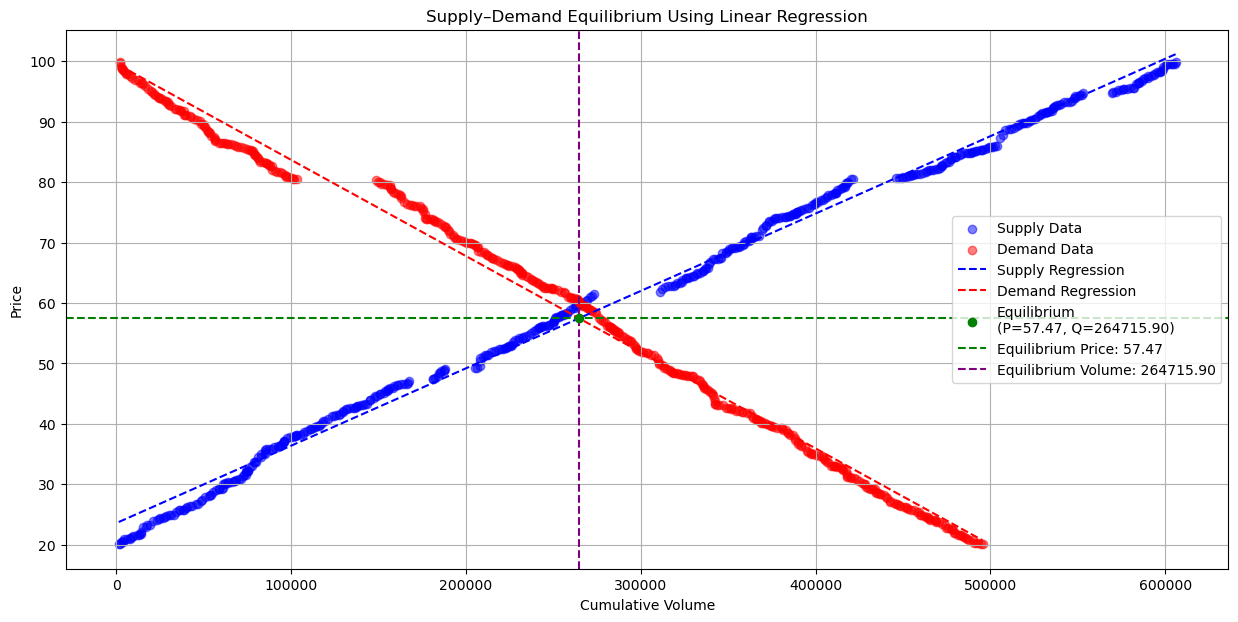

Equilibrium Price: 57.46760165820858
Equilibrium Volume: 264715.89936643816


In [16]:
# Task 2: Finding equlibrium using linear regression 

def calculate_equilibrium_linear_regression(daily_data):
    # Filter out rows with missing or invalid values in 'Price' or 'Volume'
    daily_data = daily_data.dropna(subset=['Price', 'Volume'])
    
    # Separate sell and buy orders
    sell_orders = daily_data[daily_data['Sell_Buy'] == 'sell'].copy()
    buy_orders = daily_data[daily_data['Sell_Buy'] == 'buy'].copy()

    # Sort sell orders by ascending price (supply curve)
    sell_orders = sell_orders.sort_values(by='Price').reset_index(drop=True)
    sell_orders['Cumulative_Supply'] = sell_orders['Volume'].cumsum()

    # Sort buy orders by descending price (demand curve)
    buy_orders = buy_orders.sort_values(by='Price', ascending=False).reset_index(drop=True)
    buy_orders['Cumulative_Demand'] = buy_orders['Volume'].cumsum()

    # Fit linear regression models for supply and demand curves
    supply_model = LinearRegression()
    supply_model.fit(sell_orders[['Cumulative_Supply']], sell_orders['Price'])

    demand_model = LinearRegression()
    demand_model.fit(buy_orders[['Cumulative_Demand']], buy_orders['Price'])

    # Extract regression parameters (slopes and intercepts)
    m_supply = supply_model.coef_[0]
    b_supply = supply_model.intercept_

    m_demand = demand_model.coef_[0]
    b_demand = demand_model.intercept_

    # Calculate equilibrium volume and price
    equilibrium_volume = (b_demand - b_supply) / (m_supply - m_demand)
    equilibrium_price = m_supply * equilibrium_volume + b_supply

    # Plotting the supply and demand curves along with the equilibrium point
    plt.figure(figsize=(15, 7))
    plt.scatter(sell_orders['Cumulative_Supply'], sell_orders['Price'], label='Supply Data', color='blue', alpha=0.5)
    plt.scatter(buy_orders['Cumulative_Demand'], buy_orders['Price'], label='Demand Data', color='red', alpha=0.5)

    # Plot regression lines
    supply_line = m_supply * sell_orders['Cumulative_Supply'] + b_supply
    demand_line = m_demand * buy_orders['Cumulative_Demand'] + b_demand
    plt.plot(sell_orders['Cumulative_Supply'], supply_line, label='Supply Regression', color='blue', linestyle='--')
    plt.plot(buy_orders['Cumulative_Demand'], demand_line, label='Demand Regression', color='red', linestyle='--')

    # Add equilibrium point
    plt.scatter(equilibrium_volume, equilibrium_price, color='green', label=f'Equilibrium\n(P={equilibrium_price:.2f}, Q={equilibrium_volume:.2f})', zorder=5)
    plt.axhline(y=equilibrium_price, color='green', linestyle='--', label=f'Equilibrium Price: {equilibrium_price:.2f}')
    plt.axvline(x=equilibrium_volume, color='purple', linestyle='--', label=f'Equilibrium Volume: {equilibrium_volume:.2f}')

    # Add labels, title, and legend
    plt.xlabel('Cumulative Volume')
    plt.ylabel('Price')
    plt.title('Supply–Demand Equilibrium Using Linear Regression')
    plt.legend()
    plt.grid()
    plt.show()

    return equilibrium_price, equilibrium_volume


# Load a sample daily Parquet file (replace with your file path)
parquet_file = 'processed_data/2024-01-31.parquet' 
daily_data = pd.read_parquet(parquet_file)
daily_data['Timestamp'] = pd.to_datetime(daily_data['Timestamp'], utc=True)

equilibrium_price, equilibrium_volume = calculate_equilibrium_linear_regression(daily_data)

print(f"Equilibrium Price: {equilibrium_price}")
print(f"Equilibrium Volume: {equilibrium_volume}")


In [27]:
#Task 3.1: For Renewable Energy Sceanrio +5000 MWh

#Step 1: Sum the total sell volume for each hour
# Step 1: Sum the total sell volume for each hour
def sum_hourly_sell_volume(daily_data):
    daily_data['Timestamp'] = pd.to_datetime(daily_data['Timestamp'], utc=True)
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')

    # Group by hour and calculate total sell volume
    hourly_sell_volume = (
        daily_data[daily_data['Sell_Buy'] == 'sell']
        .groupby('Hour')
        .agg(total_sell_volume=('Volume', 'sum'))
        .reset_index()
    )
    
    print("Hourly Total Sell Volumes:")
    print(hourly_sell_volume.head())
    
    return hourly_sell_volume

hourly_sell_volume = sum_hourly_sell_volume(daily_data)

# Step 2: Add 5000 MWh to the total “sell” side, distributing proportionally
def adjust_sell_volumes(daily_data, hourly_sell_volume):
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')
    sell_data = daily_data[daily_data['Sell_Buy'] == 'sell'].copy()
    sell_data = sell_data.merge(hourly_sell_volume, on='Hour', how='left')

    sell_data['shifted_volume'] = sell_data['Volume'] + (
        5000 * (sell_data['Volume'] / sell_data['total_sell_volume'])
    )

    daily_data.loc[sell_data.index, 'Volume'] = sell_data['shifted_volume']
    
    print("Adjusted Sell Volumes (first few rows):")
    print(sell_data[['Hour', 'Volume', 'shifted_volume']].head())
    
    return daily_data

adjusted_daily_data = adjust_sell_volumes(daily_data, hourly_sell_volume)

# Step 3: Re-run intersection logic with the new shifted volumes
def calculate_equilibrium_with_shifted_volumes(adjusted_daily_data):
    adjusted_daily_data = adjusted_daily_data.dropna(subset=['Price', 'Volume'])
    sell_orders = adjusted_daily_data[adjusted_daily_data['Sell_Buy'] == 'sell'].copy()
    buy_orders = adjusted_daily_data[adjusted_daily_data['Sell_Buy'] == 'buy'].copy()

    sell_orders = sell_orders.sort_values(by='Price').reset_index(drop=True)
    sell_orders['Cumulative_Supply'] = sell_orders['Volume'].cumsum()
    buy_orders = buy_orders.sort_values(by='Price', ascending=False).reset_index(drop=True)
    buy_orders['Cumulative_Demand'] = buy_orders['Volume'].cumsum()

    supply_model = LinearRegression()
    supply_model.fit(sell_orders[['Cumulative_Supply']], sell_orders['Price'])

    demand_model = LinearRegression()
    demand_model.fit(buy_orders[['Cumulative_Demand']], buy_orders['Price'])

    m_supply = supply_model.coef_[0]
    b_supply = supply_model.intercept_
    m_demand = demand_model.coef_[0]
    b_demand = demand_model.intercept_

    equilibrium_volume = (b_demand - b_supply) / (m_supply - m_demand)
    renewable_adjusted_equilibrium_price = m_supply * equilibrium_volume + b_supply

    print(f"New Renewable-Adjusted Equilibrium Price: {renewable_adjusted_equilibrium_price}")
    print(f"New Equilibrium Volume: {equilibrium_volume}")

    return renewable_adjusted_equilibrium_price, equilibrium_volume

new_renewable_adjusted_price, new_equilibrium_volume = calculate_equilibrium_with_shifted_volumes(adjusted_daily_data)


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\2522394263.py:7 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

Hourly Total Sell Volumes:
                       Hour  total_sell_volume
0 2024-01-31 00:00:00+00:00       19791.279856
1 2024-01-31 01:00:00+00:00       21288.896898
2 2024-01-31 02:00:00+00:00       10308.983887
3 2024-01-31 03:00:00+00:00       25111.503082
4 2024-01-31 04:00:00+00:00       17325.727978


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\2522394263.py:26 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

Adjusted Sell Volumes (first few rows):
                       Hour       Volume  shifted_volume
0 2024-01-31 00:00:00+00:00   665.284565      833.359740
1 2024-01-31 00:00:00+00:00   199.469520      249.862805
2 2024-01-31 00:00:00+00:00  1353.771044     1695.783045
3 2024-01-31 00:00:00+00:00   152.316948      190.797771
4 2024-01-31 00:00:00+00:00  1176.977371     1474.324834
New Renewable-Adjusted Equilibrium Price: 59.51389439871847
New Equilibrium Volume: 269015.67384407576


In [28]:
# Step 1: Sum the total sell volume for each hour (no change needed)
def sum_hourly_sell_volume(daily_data):
    daily_data['Timestamp'] = pd.to_datetime(daily_data['Timestamp'], utc=True)
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')

    hourly_sell_volume = (
        daily_data[daily_data['Sell_Buy'] == 'sell']
        .groupby('Hour')
        .agg(total_sell_volume=('Volume', 'sum'))
        .reset_index()
    )
    
    print("Hourly Total Sell Volumes:")
    print(hourly_sell_volume.head())
    
    return hourly_sell_volume

hourly_sell_volume = sum_hourly_sell_volume(daily_data)

# Step 2: Subtract 5000 MWh from the total “sell” side, distributing proportionally
def adjust_sell_volumes(daily_data, hourly_sell_volume, reduction_amount=5000):
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')
    sell_data = daily_data[daily_data['Sell_Buy'] == 'sell'].copy()
    sell_data = sell_data.merge(hourly_sell_volume, on='Hour', how='left')

    sell_data['shifted_volume'] = sell_data['Volume'] - (
        reduction_amount * (sell_data['Volume'] / sell_data['total_sell_volume'])
    )

    sell_data['shifted_volume'] = sell_data['shifted_volume'].clip(lower=0)
    daily_data.loc[sell_data.index, 'Volume'] = sell_data['shifted_volume']
    
    print("Adjusted Sell Volumes (first few rows):")
    print(sell_data[['Hour', 'Volume', 'shifted_volume']].head())
    
    return daily_data

adjusted_daily_data = adjust_sell_volumes(daily_data, hourly_sell_volume, reduction_amount=5000)

# Step 3: Re-run intersection logic with the new shifted volumes (no change needed)
def calculate_equilibrium_with_shifted_volumes(adjusted_daily_data):
    adjusted_daily_data = adjusted_daily_data.dropna(subset=['Price', 'Volume'])
    sell_orders = adjusted_daily_data[adjusted_daily_data['Sell_Buy'] == 'sell'].copy()
    buy_orders = adjusted_daily_data[adjusted_daily_data['Sell_Buy'] == 'buy'].copy()

    sell_orders = sell_orders.sort_values(by='Price').reset_index(drop=True)
    sell_orders['Cumulative_Supply'] = sell_orders['Volume'].cumsum()
    buy_orders = buy_orders.sort_values(by='Price', ascending=False).reset_index(drop=True)
    buy_orders['Cumulative_Demand'] = buy_orders['Volume'].cumsum()

    supply_model = LinearRegression()
    supply_model.fit(sell_orders[['Cumulative_Supply']], sell_orders['Price'])

    demand_model = LinearRegression()
    demand_model.fit(buy_orders[['Cumulative_Demand']], buy_orders['Price'])

    m_supply = supply_model.coef_[0]
    b_supply = supply_model.intercept_
    m_demand = demand_model.coef_[0]
    b_demand = demand_model.intercept_

    equilibrium_volume = (b_demand - b_supply) / (m_supply - m_demand)
    renewable_reduced_equilibrium_price = m_supply * equilibrium_volume + b_supply

    print(f"Renewable-Reduced Equilibrium Price: {renewable_reduced_equilibrium_price}")
    print(f"Equilibrium Volume (Reduced Supply): {equilibrium_volume}")

    return renewable_reduced_equilibrium_price, equilibrium_volume

renewable_reduced_price, new_equilibrium_volume = calculate_equilibrium_with_shifted_volumes(adjusted_daily_data)


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\588117661.py:4 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

Hourly Total Sell Volumes:
                       Hour  total_sell_volume
0 2024-01-31 00:00:00+00:00       21924.494987
1 2024-01-31 01:00:00+00:00       29487.681379
2 2024-01-31 02:00:00+00:00       10211.203265
3 2024-01-31 03:00:00+00:00       25140.564090
4 2024-01-31 04:00:00+00:00       19819.000218


C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\588117661.py:22 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

Adjusted Sell Volumes (first few rows):
                       Hour       Volume  shifted_volume
0 2024-01-31 00:00:00+00:00   833.359740      643.307531
1 2024-01-31 00:00:00+00:00   190.797771      147.285304
2 2024-01-31 00:00:00+00:00  1368.418621     1056.343332
3 2024-01-31 00:00:00+00:00  1551.817149     1197.916831
4 2024-01-31 00:00:00+00:00  1331.046864     1027.494407
Renewable-Reduced Equilibrium Price: 59.36997019450899
Equilibrium Volume (Reduced Supply): 230499.3069127032


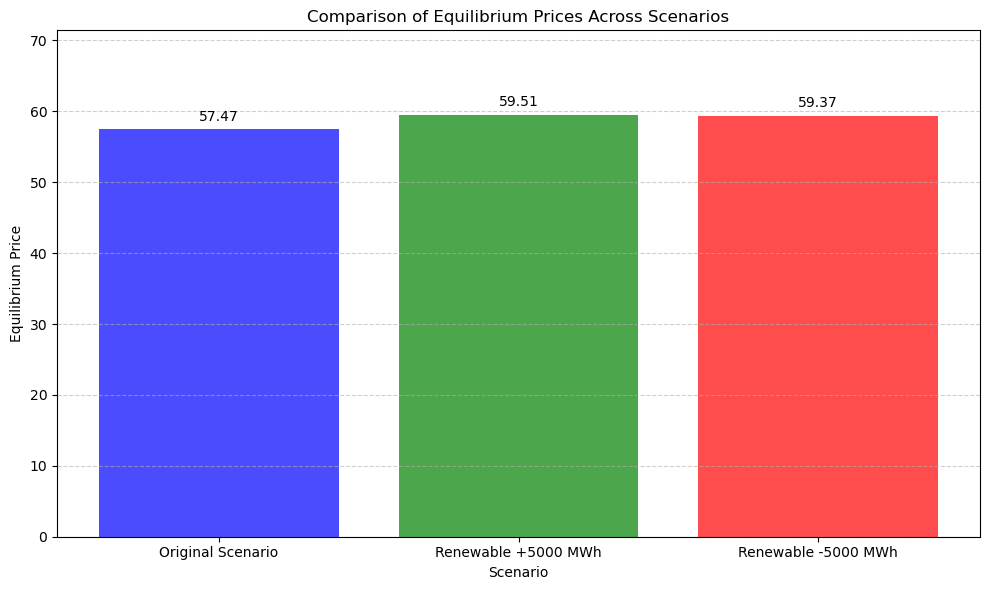

In [31]:
# Comparing equilibrium prices from all three scenarios
equilibrium_prices = {
    "Original Scenario": equilibrium_price,
    "Renewable +5000 MWh": new_renewable_adjusted_price,
    "Renewable -5000 MWh": renewable_reduced_price      
}

# Creating bar graph
scenarios = list(equilibrium_prices.keys())
prices = list(equilibrium_prices.values())

plt.figure(figsize=(10, 6))
plt.bar(scenarios, prices, color=['blue', 'green', 'red'], alpha=0.7)

# Adding labels and title
plt.xlabel("Scenario")
plt.ylabel("Equilibrium Price")
plt.title("Comparison of Equilibrium Prices Across Scenarios")
plt.ylim(0, max(prices) * 1.2)  # Adjusting the y-axis for better visualization

# Adding data labels on bars
for i, price in enumerate(prices):
    plt.text(i, price + max(prices) * 0.02, f"{price:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [32]:
#Final Summary Output and Generate hourly_summary.csv

import pandas as pd

# Function to calculate VWAP (Volume Weighted Average Price)
def calculate_vwap(data):
    vwap = (data['Price'] * data['Volume']).sum() / data['Volume'].sum()
    return vwap

# Calculate hourly metrics
def generate_hourly_summary(daily_data, equilibrium_price, new_renewable_adjusted_price, renewable_reduced_price):
    daily_data['Hour'] = daily_data['Timestamp'].dt.floor('H')

    # Group by hour and calculate metrics
    hourly_summary = (
        daily_data.groupby('Hour')
        .agg(
            avg_price=('Price', 'mean'),
            min_price=('Price', 'min'),
            max_price=('Price', 'max'),
            total_volume=('Volume', 'sum'),
            vwap=('Price', lambda x: calculate_vwap(daily_data[daily_data['Hour'] == x.name]))
        )
        .reset_index()
    )

    # Add equilibrium prices for each scenario
    hourly_summary['Original_Equilibrium_Price'] = equilibrium_price
    hourly_summary['Equilibrium_Price_+5000_MWh'] = new_renewable_adjusted_price
    hourly_summary['Equilibrium_Price_-5000_MWh'] = renewable_reduced_price

    # Save to CSV
    hourly_summary.to_csv('hourly_summary.csv', index=False)

    print("Hourly summary saved as 'hourly_summary.csv'.")
    return hourly_summary

# Generate the summary
hourly_summary = generate_hourly_summary(
    daily_data,
    equilibrium_price,
    new_renewable_adjusted_price,
    renewable_reduced_price
)

# Preview the generated hourly summary
print(hourly_summary.head())




C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\2171128376.py:12 FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\Pavillon Plus\AppData\Local\Temp\ipykernel_15452\2171128376.py:7 RuntimeWarning: invalid value encountered in scalar divide

Hourly summary saved as 'hourly_summary.csv'.
                       Hour  avg_price  min_price  max_price  total_volume  \
0 2024-01-31 00:00:00+00:00  62.836111      20.51      99.86  37327.967584   
1 2024-01-31 01:00:00+00:00  58.931829      20.23      95.06  33034.338804   
2 2024-01-31 02:00:00+00:00  54.499444      21.40      92.11  26782.980194   
3 2024-01-31 03:00:00+00:00  63.602917      21.68      96.78  37587.424499   
4 2024-01-31 04:00:00+00:00  60.441081      23.78      99.62  37404.043893   

   vwap  Original_Equilibrium_Price  Equilibrium_Price_+5000_MWh  \
0   NaN                   57.467602                    59.513894   
1   NaN                   57.467602                    59.513894   
2   NaN                   57.467602                    59.513894   
3   NaN                   57.467602                    59.513894   
4   NaN                   57.467602                    59.513894   

   Equilibrium_Price_-5000_MWh  
0                     59.36997  
1         

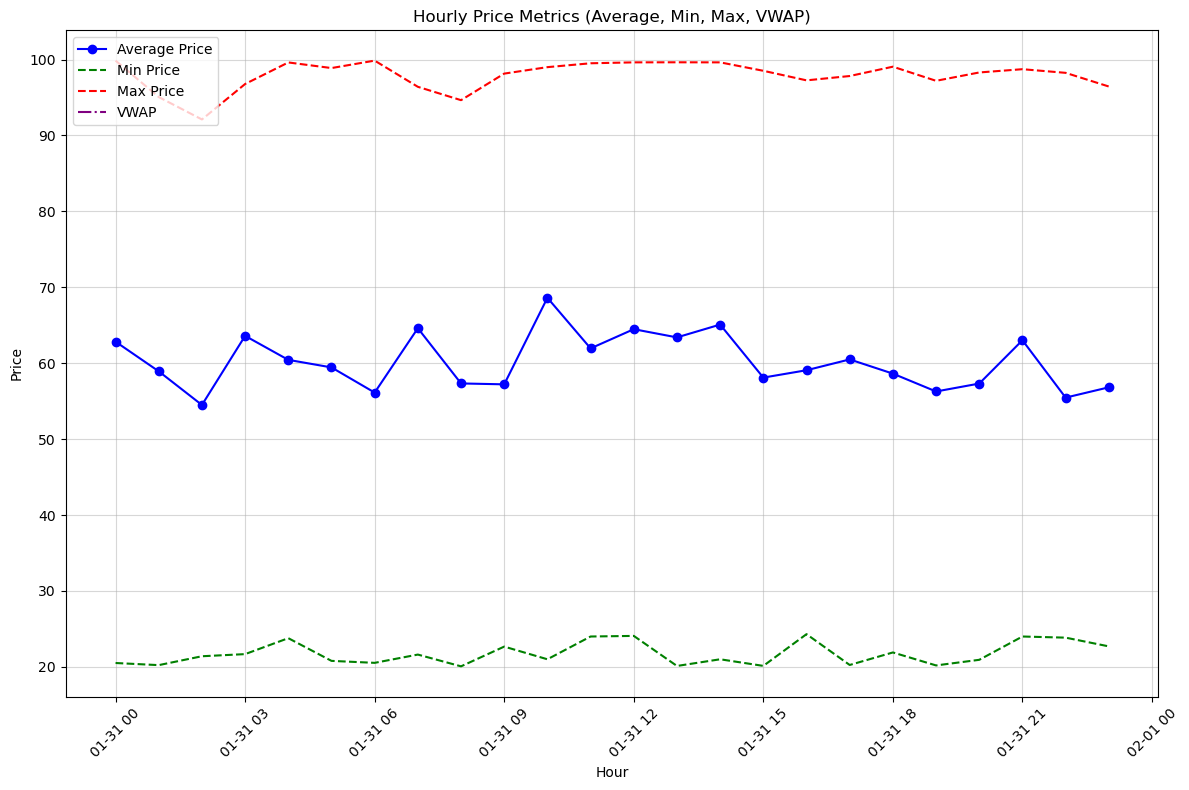

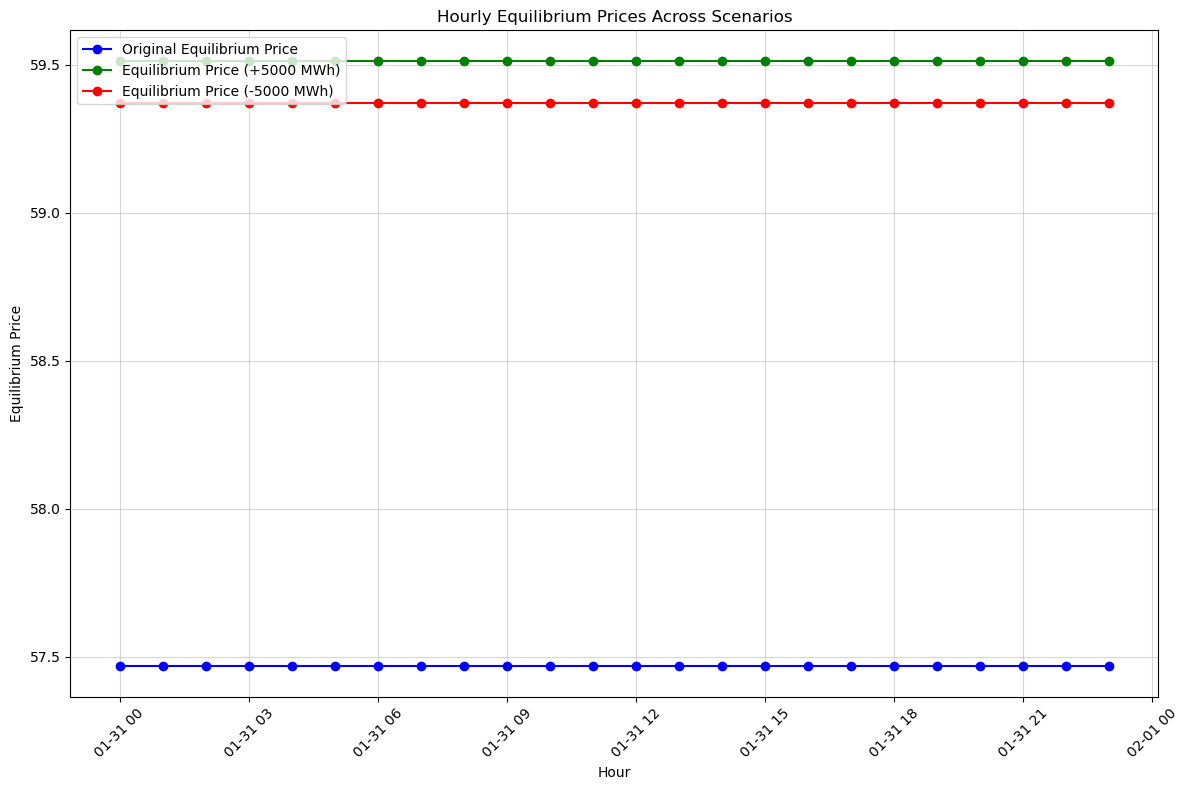

In [33]:
#Code for Visualizing the Hourly Summary

import matplotlib.pyplot as plt
import pandas as pd

# Load the hourly summary
hourly_summary = pd.read_csv("hourly_summary.csv", parse_dates=["Hour"])

# Plot 1: Hourly Metrics (Average Price, Min Price, Max Price, VWAP)
def plot_hourly_metrics(hourly_summary):
    plt.figure(figsize=(12, 8))

    # Plot Average, Min, and Max Prices
    plt.plot(hourly_summary['Hour'], hourly_summary['avg_price'], label='Average Price', color='blue', marker='o')
    plt.plot(hourly_summary['Hour'], hourly_summary['min_price'], label='Min Price', color='green', linestyle='--')
    plt.plot(hourly_summary['Hour'], hourly_summary['max_price'], label='Max Price', color='red', linestyle='--')

    # Plot VWAP
    plt.plot(hourly_summary['Hour'], hourly_summary['vwap'], label='VWAP', color='purple', linestyle='-.')

    # Add labels, title, and legend
    plt.xlabel("Hour")
    plt.ylabel("Price")
    plt.title("Hourly Price Metrics (Average, Min, Max, VWAP)")
    plt.legend(loc="upper left")
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot 2: Hourly Equilibrium Prices Across Scenarios
def plot_equilibrium_prices(hourly_summary):
    plt.figure(figsize=(12, 8))

    # Plot equilibrium prices for the three scenarios
    plt.plot(hourly_summary['Hour'], hourly_summary['Original_Equilibrium_Price'], label='Original Equilibrium Price', color='blue', marker='o')
    plt.plot(hourly_summary['Hour'], hourly_summary['Equilibrium_Price_+5000_MWh'], label='Equilibrium Price (+5000 MWh)', color='green', marker='o')
    plt.plot(hourly_summary['Hour'], hourly_summary['Equilibrium_Price_-5000_MWh'], label='Equilibrium Price (-5000 MWh)', color='red', marker='o')

    # Add labels, title, and legend
    plt.xlabel("Hour")
    plt.ylabel("Equilibrium Price")
    plt.title("Hourly Equilibrium Prices Across Scenarios")
    plt.legend(loc="upper left")
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to generate plots
plot_hourly_metrics(hourly_summary)
plot_equilibrium_prices(hourly_summary)
